In [26]:
import pandas as pd
import numpy as np
import datetime 
from scipy.stats import norm
from matplotlib import pyplot as plt
csv_path = r"C:/Users/edgil/Documents/Masters/dissertation/data/eurusd_hour.csv"

In [2]:
eurusd = pd.read_csv(csv_path)
eurusd['date'] = pd.to_datetime(eurusd['Date'])

In [62]:
eurusd.columns

Index(['Date', 'Hour', 'BidOpen', 'BidHigh', 'BidLow', 'BidClose', 'BidChange',
       'AskOpen', 'AskHigh', 'AskLow', 'AskClose', 'AskChange', 'date',
       'MidOpen', 'MidClose', 'MidClose_pct_chg'],
      dtype='object')

In [89]:
#Make the neccessary transforms on the data.
eurusd.columns
eurusd['MidOpen'] = (eurusd['BidOpen'] + eurusd['AskOpen'])/2
eurusd['MidClose'] = (eurusd['BidClose'] + eurusd['AskClose'])/2
eurusd['MidClose_pct_chg'] = eurusd['MidClose'].pct_change()
daily_0800 = eurusd.loc[eurusd['Hour'] == "08:00"]
daily_0800['MidClose_pct_chg'] = daily_0800['MidClose'].pct_change()
daily_1600 = eurusd.loc[eurusd['Hour'] == "16:00"]
daily_1600['MidClose_pct_chg'] = daily_1600['MidClose'].pct_change()
(mu, sigma) = norm.fit(daily_0800['MidClose_pct_chg'].dropna(how='all'))
print(mu)
print(sigma)

-2.8926867366151993e-05
0.0059869003100279


C:\Users\edgil\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\edgil\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


count    3664.000000
mean       -0.000029
std         0.005988
min        -0.034739
25%        -0.003254
50%         0.000058
75%         0.003279
max         0.036931
Name: return, dtype: float64

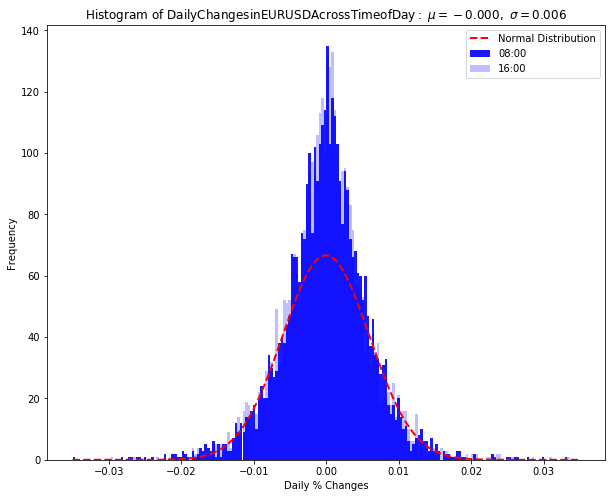

In [121]:
import matplotlib.mlab as mlab
#bins = 100
plt.figure(1, figsize=(10, 8))
n, bins, patches = plt.hist(daily_0800['MidClose_pct_chg'].dropna(how="all"), normed=False, bins=200, range=(-0.035,0.035),color = "b",alpha = 0.9)
n, bins, patches = plt.hist(daily_1600['MidClose_pct_chg'].dropna(how="all"), 
                            normed=False, bins=200, range=(-0.035,0.035),color = "b",alpha= 0.25)
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)
plt.xlabel('Daily % Changes')
plt.ylabel('Frequency')
plt.title(r'$\mathrm{Histogram\ of\ Daily Changes in EURUSD Across Time of Day:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.legend(['Normal Distribution',"08:00" ,"16:00"])
plt.savefig("C:/Users/edgil/Documents/Masters/dissertation/document/images/EURUSDhistogram.png")

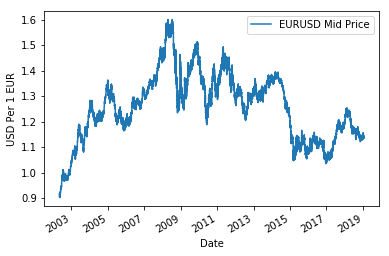

In [18]:
fig = plt.figure(1, figsize=(16, 16))
eur_plt = eurusd.plot(x= "date", y = "MidClose", label = "EURUSD Mid Price")
eur_plt.set_xlabel("Date")
eur_plt.set_ylabel("USD Per 1 EUR")
eur_plt.get_figure().savefig("C:/Users/edgil/Documents/Masters/dissertation/document/images/EURUSDPrice.png")

In [21]:
x = eurusd.loc[eurusd['date'] <= "1/1/2010"]
x['Date'].tail()

33009    2009-12-31
33010    2009-12-31
33011    2009-12-31
33012    2009-12-31
33013    2009-12-31
Name: Date, dtype: object

C:\Users\edgil\AppData\Local\Programs\Python\Python36\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
C:\Users\edgil\AppData\Local\Programs\Python\Python36\lib\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\edgil\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\cbook\__init__.py:1856: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\Users\edgil\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\cbook\__init__.py:1863: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
C:\Users\edgil\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\cbook\__init__.py:1871: RuntimeWarning: invalid value en

{'whiskers': [<matplotlib.lines.Line2D at 0xadd1130>,
 'caps': [<matplotlib.lines.Line2D at 0xacaa7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0xadd1090>,
 'medians': [<matplotlib.lines.Line2D at 0xacaa4d0>,
 'fliers': [<matplotlib.lines.Line2D at 0xacaa350>,
 'means': []}

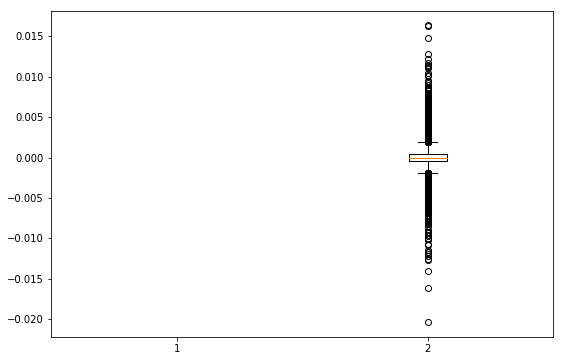

In [37]:
# create the code to display box plots of each year, in terms of volatility, you need to create timesereis return
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
eurusd['bidClose_pct_chg'] = eurusd.BidClose.pct_change()
#eurusd[eurusd['date'] <= "1/1/2010"].boxplot("bidClose_pct_chg")
#eurusd[eurusd['date'] > "1/1/2010"].boxplot("bidClose_pct_chg")
plt.boxplot([1, eurusd.loc[eurusd['date'] > "1/1/2010"]['bidClose_pct_chg']])
x = eurusd.loc[eurusd['date'] <= "1/1/2010"]['bidClose_pct_chg']